<a href="https://colab.research.google.com/github/Lawrence-Krukrubo/EDA/blob/master/gads_wk_6_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from bs4 import BeautifulSoup
import requests  # library to handle requests

build and deploy a model in [AML](https://thenewstack.io/build-and-deploy-a-machine-learning-model-with-azure-ml-service/)

train and deploy with [colab](https://medium.com/tensorflow/train-on-google-colab-and-run-on-the-browser-a-case-study-8a45f9b1474e)

See GCP link to deploy trained tensorflow models:[Link](https://cloud.google.com/ai-platform/prediction/docs/deploying-models)

more links:

1. [link](https://towardsdatascience.com/build-and-deploy-your-first-machine-learning-web-app-e020db344a99)


2. [link](https://blog.cambridgespark.com/deploying-a-machine-learning-model-to-the-web-725688b851c7)

3. [link](https://www.geeksforgeeks.org/deploy-machine-learning-model-using-flask/)

4. [link](https://developer.ibm.com/tutorials/deploy-a-python-machine-learning-model-as-a-web-service/)

In [46]:
site_link = 'http://community.andela.com/index.php/leadership-board/'

We need to scrape the data containing the table from the website saved as `site_link`. <br>First, let's get the source code from the website

In [47]:
source = requests.get(site_link).text

Lets Use BeautifulSoup to parse it

In [48]:
soup = BeautifulSoup(source, 'lxml')

# Let's pretty print it and see what it looks like

#print(soup.prettify())

Next let's get the table that contains the data we want to scrape

In [49]:
my_table = soup.find_all('td')

# Let's view the first 20 lines from the table
my_table[:20]

[<td width="112px"><img alt="" class="alignnone wp-image-3299" height="111" src="http://community.andela.com/wp-content/uploads/2020/06/Top-learner.png" width="112"/></td>,
 <td>
 <h3>Pharis Muigai</h3>
 <p>223 learning hours.Kenya<strong>.</strong></p></td>,
 <td width="112px"><img alt="" class="alignnone wp-image-3299" height="111" src="http://community.andela.com/wp-content/uploads/2020/06/Top-learner.png" width="112"/></td>,
 <td>
 <h3>Khalil Henchi</h3>
 <p>211 learning hours. <strong>Tunisia.</strong></p></td>,
 <td width="191px"><img alt="" class="alignnone wp-image-3454" height="103" src="http://community.andela.com/wp-content/uploads/2020/06/skill-IQ-trimmed.png" width="191"/></td>,
 <td>
 <h3>Ahmed Hany</h3>
 <p>300 skill IQ Score. Egypt<strong>.</strong></p></td>,
 <td width="191px"><img alt="" class="alignnone wp-image-3454" height="103" src="http://community.andela.com/wp-content/uploads/2020/06/skill-IQ-trimmed.png" width="191"/></td>,
 <td>
 <h3>Godfred Asamoah</h3>
 <p>

Next let's iterate through each link and append only the text parts

In [50]:
# First let's see what kind of object this table is
type(my_table)

bs4.element.ResultSet

In [51]:
table_text = []

for data in my_table:
    table_text.append(data.text)

print(len(table_text))

123512


Let's see the cleaned text, without the html tags

In [52]:
# So we see that the relevent text we need starts from the index 8 till the end
# So let's display from just 8 to 26, displaying data for first 3 students

table_text[8:26]

['1',
 'Lukman Ahmed',
 'Nigeria',
 '35',
 '231',
 '258',
 '2',
 'Okwuchukwu Nwachukwu',
 'Egypt',
 '30',
 '289',
 '191',
 '3',
 'Adebisi Yusuf',
 'Nigeria',
 '29',
 '288',
 '181']

Therefore let's make the table_text to start from index 8 till the end

In [53]:
table_text = table_text[8:]

# Let's sconfirm the length
len(table_text)

123504

Next, we create a dictionary with the right table columns as keys, then append the data for each student in the dictionary

In [54]:
student_dict = {'Rank':[], 'Name':[], 'Country':[], 'Total_points':[], 'SkillIQ_score':[], 'Learning_hours':[]}

So now we need to iterate through the list of table texts and append student details accordingly to the students dictionary above.

In [55]:
# First let's make a copy of the table_test to be on the safe side
table_text_copy = table_text[:]
len(table_text_copy)

123504

In [56]:
stopper = 6  # setting an index stopper variable

while True:
    
    if not table_text_copy: 
        break

    for i in range(stopper):
        if i == 1:
            student_dict['Name'].append(table_text_copy[i])
        elif i == 2:
            student_dict['Country'].append(table_text_copy[i])
        elif i == 3:
            student_dict['Total_points'].append(table_text_copy[i])
        elif i == 4:
            student_dict['SkillIQ_score'].append(table_text_copy[i])
        elif i == 5:
            student_dict['Learning_hours'].append(table_text_copy[i])
        else:
            student_dict['Rank'].append(table_text_copy[i])

    if table_text_copy:
        table_text_copy = table_text_copy[stopper:]

Now that we have a dictionary containing details for over 20,000 students, lets start data preprocessing.<br> First, let's put the data set in a pandas Data Frame

In [57]:
gads_df = pd.DataFrame(student_dict)
gads_df.head()

,Rank,Name,Country,Total_points,SkillIQ_score,Learning_hours
0,1,Lukman Ahmed,Nigeria,35,231,258
1,2,Okwuchukwu Nwachukwu,Egypt,30,289,191
2,3,Adebisi Yusuf,Nigeria,29,288,181
3,4,Pharis Muigai,Kenya,28,160,223
4,5,Evans Nandwa,Kenya,26,146,210


Let's see the shape of the data set to confirm we captured all records for all students on the leader board

In [58]:
print(gads_df.shape)

(20584, 6)


Some questions to look at:
1. The Top 5000 Learners: what are their qualities, mean learning time, divide by 6 to find mean weekly learning time. mean top score and any other metric 
2. The Least 5000 learners:
3. The Top Learners per country
4. The range of scores in the data set.
5. Find active students: defined as those who score minimum of 100 or minimum of 10 hours
6. recall how students earn points
7. Sort the data by students points alone, deleting skill-iq and learning hours
8. Sort the data by students skill-IQ alone, deleting points and learning hours
8. Sort the data by learning hours alone, deleting skill-iq and points
9. For each sort, select the top 5000 students
10. Then find the total students from the top 5000 per list that appear on all the sorted list as top learners 
11. Then merge that list together taking the points, learning hours and skill-iq
12. Bin the entire data set into top-performers, ave-performers and low-performers and train a neural network to rightly classify them.

In [59]:
gads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20584 entries, 0 to 20583
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            20584 non-null  object
 1   Name            20584 non-null  object
 2   Country         20584 non-null  object
 3   Total_points    20584 non-null  object
 4   SkillIQ_score   20584 non-null  object
 5   Learning_hours  20584 non-null  object
dtypes: object(6)
memory usage: 965.0+ KB


From the info() method, we can see that all the data is type object or categorical.<br> We need to convert the numerical columns to integers so we can make use them for our analysis

In [60]:
gads_df[['Rank', 'Total_points', 'SkillIQ_score', 'Learning_hours']] = gads_df[['Rank', 'Total_points', 'SkillIQ_score', 'Learning_hours']].astype('int')

Let's see the info() method again

In [61]:
gads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20584 entries, 0 to 20583
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            20584 non-null  int64 
 1   Name            20584 non-null  object
 2   Country         20584 non-null  object
 3   Total_points    20584 non-null  int64 
 4   SkillIQ_score   20584 non-null  int64 
 5   Learning_hours  20584 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 965.0+ KB


Nice one, let's see some summary Statistics about the data

In [62]:
gads_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,20584.0,10292.500000,5942.233306,1.0,5146.75,10292.5,15438.25,20584.0
Total_points,20584.0,3.973717,3.980145,0.0,0.00,3.0,7.00,35.0
SkillIQ_score,20584.0,76.761951,79.339309,0.0,0.00,66.0,142.00,300.0
Learning_hours,20584.0,13.329868,16.328593,1.0,3.00,8.0,18.00,258.0


The summary descriptive Statistics data above tells us a lot about the entire data set;

1. Total count of students as at the end of learning-Phase-1 is **20,584**.
2. The average learning hours so far is 13 hours.
3. The average Skill IQ Score is 77.
4. The inter-quartile ranges also tell us that 75% of Learners did no more than 18 hours and scored no more than 142 IQ Scores.
5. We can also see that the minimum Skill IQ Score is 0 and max  is 300, while minimum Learning hours is 1 and max is 258.

Let's see our data again

In [63]:
gads_df.head(10)

,Rank,Name,Country,Total_points,SkillIQ_score,Learning_hours
0,1,Lukman Ahmed,Nigeria,35,231,258
1,2,Okwuchukwu Nwachukwu,Egypt,30,289,191
2,3,Adebisi Yusuf,Nigeria,29,288,181
3,4,Pharis Muigai,Kenya,28,160,223
4,5,Evans Nandwa,Kenya,26,146,210
5,6,Gatchang Stephen,South Sudan,26,150,207
6,7,Francis Obetta,Nigeria,25,280,148
7,8,Khalil Henchi,Tunisia,25,111,211
8,9,Seyum Alemayehu,Ethiopia,24,274,137
9,10,Ngozichukwu Uzoigwe,Nigeria,24,119,197


Let's finetune the data some more, let's replace the index with the rank column

In [64]:
gads_df.set_index('Rank', drop=True, inplace=True)

gads_df.head(10)

,Name,Country,Total_points,SkillIQ_score,Learning_hours
Rank,,,,,
1,Lukman Ahmed,Nigeria,35,231,258
2,Okwuchukwu Nwachukwu,Egypt,30,289,191
3,Adebisi Yusuf,Nigeria,29,288,181
4,Pharis Muigai,Kenya,28,160,223
5,Evans Nandwa,Kenya,26,146,210
6,Gatchang Stephen,South Sudan,26,150,207
7,Francis Obetta,Nigeria,25,280,148
8,Khalil Henchi,Tunisia,25,111,211
9,Seyum Alemayehu,Ethiopia,24,274,137


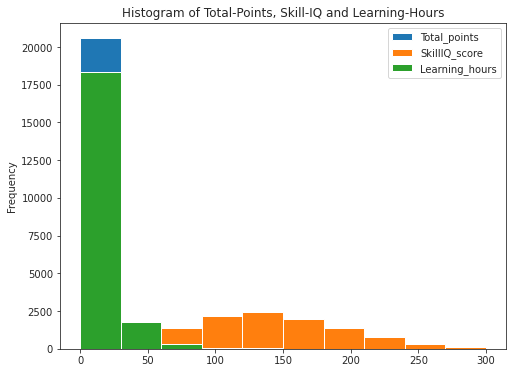

In [120]:
gads_df.plot(kind='hist', figsize=(8,6))
plt.title('Histogram of Total-Points, Skill-IQ and Learning-Hours')
plt.show()

Next, let's create a Data Frame of students that met either the minimum 100 points or 10 learning hours

In [65]:
qualified_students_df = gads_df[(gads_df['SkillIQ_score'] >= 100) | (gads_df['Learning_hours'] >= 10)]

qualified_students_df.head()

,Name,Country,Total_points,SkillIQ_score,Learning_hours
Rank,,,,,
1,Lukman Ahmed,Nigeria,35,231,258
2,Okwuchukwu Nwachukwu,Egypt,30,289,191
3,Adebisi Yusuf,Nigeria,29,288,181
4,Pharis Muigai,Kenya,28,160,223
5,Evans Nandwa,Kenya,26,146,210


Let's see the total number of students that have this minimum qualification

In [66]:
print(f'The number of minimum qualified students is {len(qualified_students_df)}, out of {len(gads_df)} total students. \
\nThis leaves a difference of {len(gads_df) - len(qualified_students_df)} Non-qualified students')

The number of minimum qualified students is 12435, out of 20584 total students. 
This leaves a difference of 8149 Non-qualified students


In [67]:
qualified_students_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_points,12435.0,6.276076,3.477347,0.0,4.0,6.0,8.0,35.0
SkillIQ_score,12435.0,119.377483,73.256223,0.0,75.0,129.0,171.0,300.0
Learning_hours,12435.0,19.809409,18.221967,1.0,10.0,15.0,25.0,258.0


The descriptive summary Statistics of Total Qulaified Students show that:-

1. Total Qualified students as at the end of learning-Phase-1 is 12,435.
2. The average learning hours for all qualified student is 20 hours.
3. The average Skill IQ for Qualified students is 119.
4. The inter-quartile ranges also tell us that 75% of Learners did no more than 25 hours and scored no more than 171 IQ Scores.
5. We can also see that the minimum Skill IQ Score for Qualified Students is 0 and max is 300, while minimum Learning hours is 1 and max is still 258.

Let's see histograms of Qulaified Students Quantitaive Data

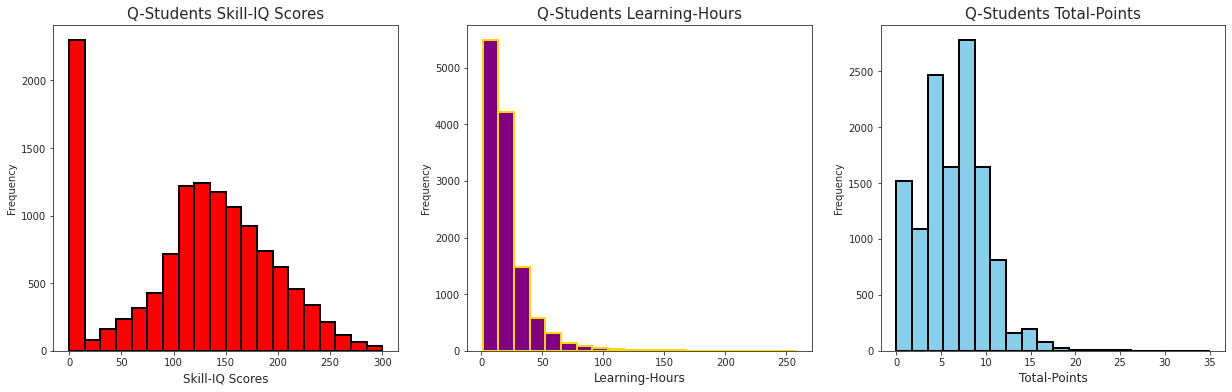

In [122]:
fig = plt.figure(figsize=(21,6))
sns.set_style('ticks')
fig.add_subplot(1,3,1)
qualified_students_df.SkillIQ_score.plot(kind='hist', linewidth=2, edgecolor='black', color='red', bins=20)
plt.title('Q-Students Skill-IQ Scores', fontsize=15)
plt.xlabel('Skill-IQ Scores', fontsize=12)

fig.add_subplot(1,3,2)
qualified_students_df.Learning_hours.plot(kind='hist', linewidth=2, edgecolor='gold', color='purple', bins=20)
plt.title('Q-Students Learning-Hours', fontsize=15)
plt.xlabel('Learning-Hours', fontsize=12)

fig.add_subplot(1,3,3)
qualified_students_df.Total_points.plot(kind='hist', linewidth=2, edgecolor='black', color='skyblue', bins=20)
plt.title('Q-Students Total-Points', fontsize=15)
plt.xlabel('Total-Points', fontsize=12)

plt.show()

<b><h3>Visual Analysis:</b></h3>

Out of these 12,435 qualified students, let's see those who met both min IQ score and min learning hours together

In [ ]:
min_iq_and_min_hours = qualified_students_df.query('SkillIQ_score >= 100 and Learning_hours >= 10')
print(len(min_iq_and_min_hours))
# let's see the head
min_iq_and_min_hours.head()

So out of total qualified 12,435 qualified students, we see that 5,561 met both min IQ and min hours. let's see the number that met only IQ or hours minimum.

In [ ]:
min_iq_only = qualified_students_df.query('SkillIQ_score >= 100 and Learning_hours < 10')
len(min_iq_only)

So 3025 students out of the 12,435 students met only the minimum IQ.<br>
We can simply deduct this to get those who met only min learning. but let's use pandas filtering to be sure. 

In [ ]:
min_hours_only = qualified_students_df.query('Learning_hours >= 10 and SkillIQ_score < 100')
len(min_hours_only)

Let's confirm the split

In [ ]:
len(min_hours_only) + len(min_iq_only) == len(min_iq_or_min_learning_df)

So from the above filtering we have been doing, we can see that:-

1. Total Students by end of Learning-Phase 1 = **20,584**
2. Total Qualified Students who met minimum learning and or minimum IQ score = **12,435**
3. Total Qualified who met only minimum IQ Score = **3025**
4. Total Qualified who met only minimum Hours = **3849**

In [ ]:
Stop

Let's see the individual countries represented in the scheme

In [ ]:
country_list = gads_df.Country.unique()
country_list

Let's see howmany countries


In [ ]:
len(country_list)

Let's see the number of students per country

In [ ]:
count_df = gads_df.groupby('Country').size().to_frame()

# Let's visualise the data frame
count_df.head()

Let's add the 

In [ ]:
count_df.index.name = None
count_df.columns = ['Count']
count_df.head()

In [ ]:
count_df.sort_values(by='Count', ascending=True, inplace=True)

In [ ]:
sns.set_style('ticks')
count_df.plot(kind='barh', figsize=(12,12))
plt.plot()

Let's see the Probability Density Functions for the `Total points`, `skillIq Score` and `Learning hours`

In [ ]:
fig = plt.figure(figsize=(18,4))
fig.add_subplot(1,3,1)
gads_df['Total points'].plot.kde(color='red')
plt.title('PDF Plot for Total points')

fig.add_subplot(1,3,2)
gads_df['SkillIQ Score'].plot.kde()
plt.title('PDF Plot for Skill-IQ Scores')

fig.add_subplot(1,3,3)
gads_df['Learning hours'].plot.kde(color='green')
plt.title('PDF Plot for Learning Hours')


plt.show()

In [ ]:
fig = plt.figure(figsize=(18,4))
fig.add_subplot(1,3,1)
gads_df['Total points'].plot(kind='hist', color='red')
plt.title('Hist Plot for Total points')

fig.add_subplot(1,3,2)
gads_df['SkillIQ Score'].plot(kind='hist')
plt.title('Hist Plot for Skill-IQ Scores')

fig.add_subplot(1,3,3)
gads_df['Learning hours'].plot(kind='hist', color='green')
plt.title('Hist Plot for Learning Hours')


plt.show()

let's see active students. Those who either score a minmum of 100 or watch 10 hours

In [ ]:
active_students_df = gads_df[(gads_df['Learning hours'] >= 10) | (gads_df['SkillIQ Score'] >= 100)]

# Let's print out how many total students we have
print(f'The total number of Active Students is: {len(active_students_df)}')

# Let's see the first few data of the active_students_df
active_students_df.head()

Let's sort the active students by skill-IQ score and learning hours 

In [ ]:
active_students_df.sort_values(by=['SkillIQ Score', 'Total points', 'Learning hours'], ascending=False, inplace=True)
active_students_df.head()

In [ ]:
sns.distplot(gads_df['SkillIQ Score'], hist=True, color='r')
plt.show()

In [ ]:
sns.boxplot(gads_df['SkillIQ Score'])

In [ ]:
pd.plotting.scatter_matrix(gads_df[['SkillIQ Score', 'Total points', 'Learning hours']], figsize=[10,10], color='r')
plt.suptitle('Scatter Matrix of Skill-IQ, Total-Points and Learning-Hours', fontsize=16, y=0.94)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
corr = gads_df.drop('Rank', axis=1)
corr_df = corr.corr()
sns.heatmap(corr_df, annot=True, linewidths=3, linecolor='r')
plt.title('Correlation Heatmap of Total-Points, Skill-IQ and Learning-hours', fontsize=16, y=1.5)
plt.show()

Above Corr matrix shows that there is surprisingly no correlation between learning hours and skill-IQ. And none between learning hours and total points or total points and skill-iq. Each metric is independent and unique

Let's check the top IQ scores, you may be surprised that learners without long watching time may score high IG scores